In [19]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [21]:
# 讀取資料
df1 = pd.read_csv('L10_Train.csv')
df2 = pd.read_csv('L10_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (91340, 8)
Shape of df2: (10360, 8)


In [22]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,10,2024-03-01 17:14:06.000,0.0,1017.48,15.59,94.30,652.92,0.12
1,10,2024-03-01 17:14:47.000,0.0,1017.48,15.66,94.04,682.50,0.12
2,10,2024-03-01 17:15:47.000,0.0,1017.47,15.74,94.10,750.00,0.14
3,10,2024-03-01 17:16:47.000,0.0,1017.46,15.78,94.09,738.33,0.14
4,10,2024-03-01 17:17:47.000,0.0,1017.49,15.80,94.08,660.83,0.12
...,...,...,...,...,...,...,...,...
101695,10,2024-10-02 17:33:21.000,0.7,1006.20,24.21,100.00,59.17,0.00
101696,10,2024-10-02 17:34:21.000,0.0,1006.11,24.21,100.00,53.33,0.00
101697,10,2024-10-02 17:35:21.000,0.0,1006.10,24.25,100.00,45.83,0.00
101698,10,2024-10-02 17:36:21.000,0.0,1006.11,24.26,100.00,35.83,0.00


In [23]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101700.0,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000
mean,10.0,0.440297,1008.267588,30.597223,71.964359,16325.713891,178.302390
std,0.0,0.935875,4.925908,7.568174,24.377481,25581.681127,412.620889
min,10.0,0.000000,995.960000,13.630000,11.800000,20.000000,0.000000
25%,10.0,0.000000,1005.000000,25.240000,53.450000,2380.830000,1.330000
50%,10.0,0.000000,1007.300000,29.490000,75.390000,6628.330000,11.010000
75%,10.0,0.350000,1011.070000,34.800000,96.560000,17493.330000,82.660000
max,10.0,10.100000,1024.520000,56.800000,100.000000,117758.200000,2393.100000


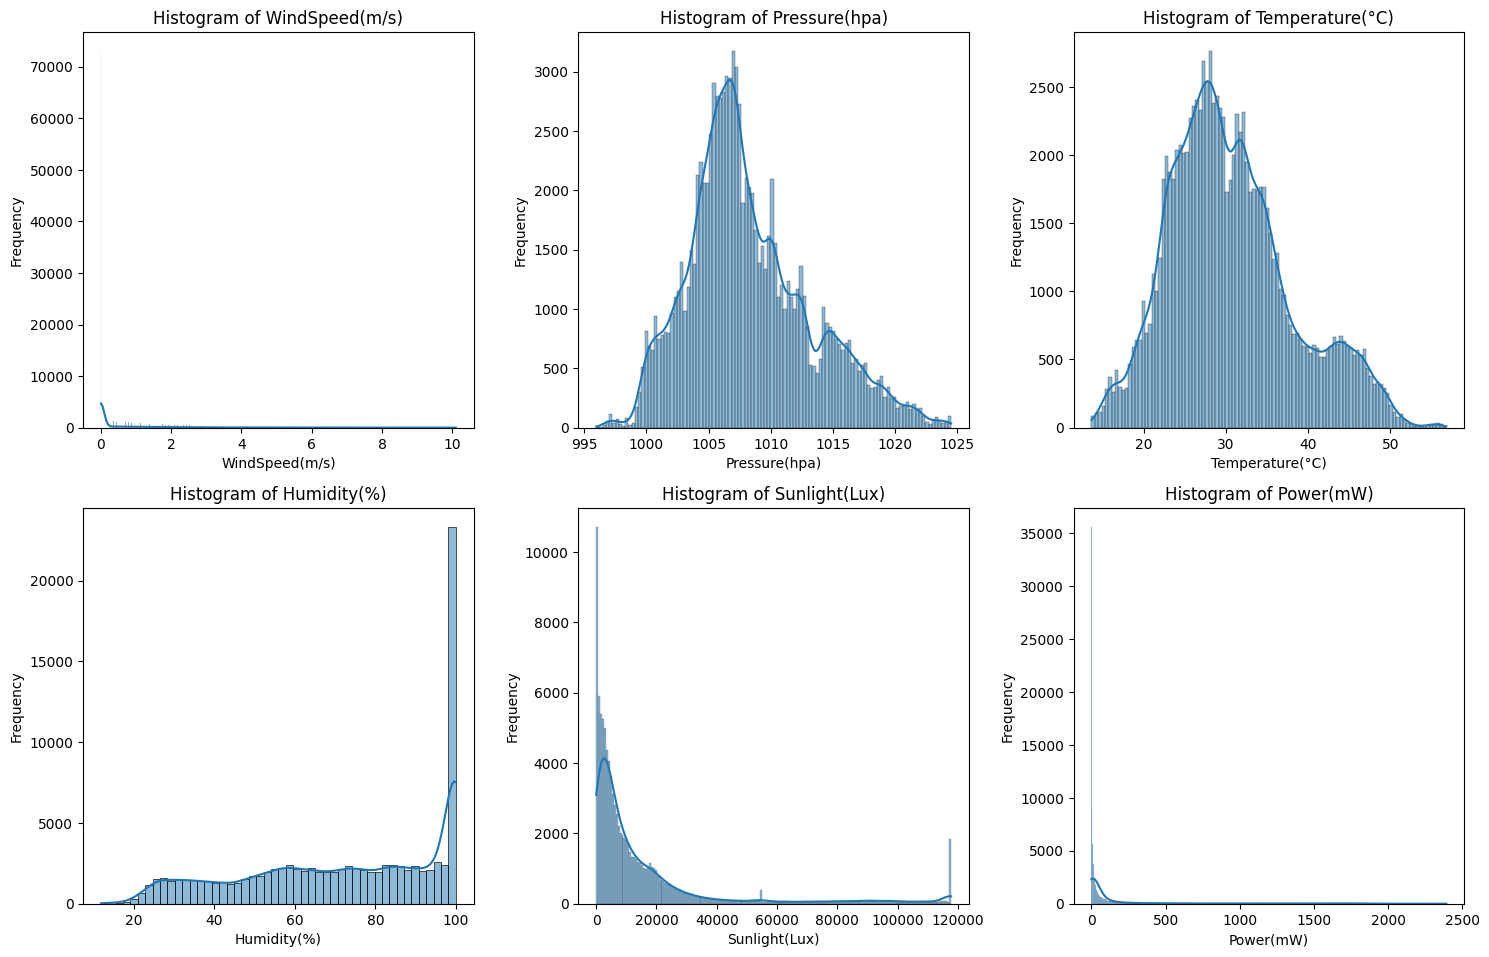

In [24]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [25]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
1115,10,2024-03-03 11:50:47.000,1.57,1016.37,32.99,38.14,117758.2,2337.67
1209,10,2024-03-03 13:24:47.000,1.31,1014.74,28.49,46.77,117758.2,2393.10
1212,10,2024-03-03 13:27:47.000,0.70,1014.59,30.95,38.25,117758.2,2023.63
1902,10,2024-03-04 12:44:47.000,1.83,1009.87,39.59,24.18,117758.2,1857.72
1903,10,2024-03-04 12:45:47.000,1.13,1009.77,39.81,23.14,117758.2,1849.07
...,...,...,...,...,...,...,...,...
98279,10,2024-09-27 12:20:10.000,1.22,1004.95,47.88,25.81,117758.2,1811.78
98280,10,2024-09-27 12:21:10.000,1.22,1004.93,48.23,26.07,117758.2,1891.84
98281,10,2024-09-27 12:22:10.000,1.65,1004.91,48.27,25.58,117758.2,1922.99
98282,10,2024-09-27 12:23:10.000,1.13,1004.88,48.55,26.16,117758.2,1919.72


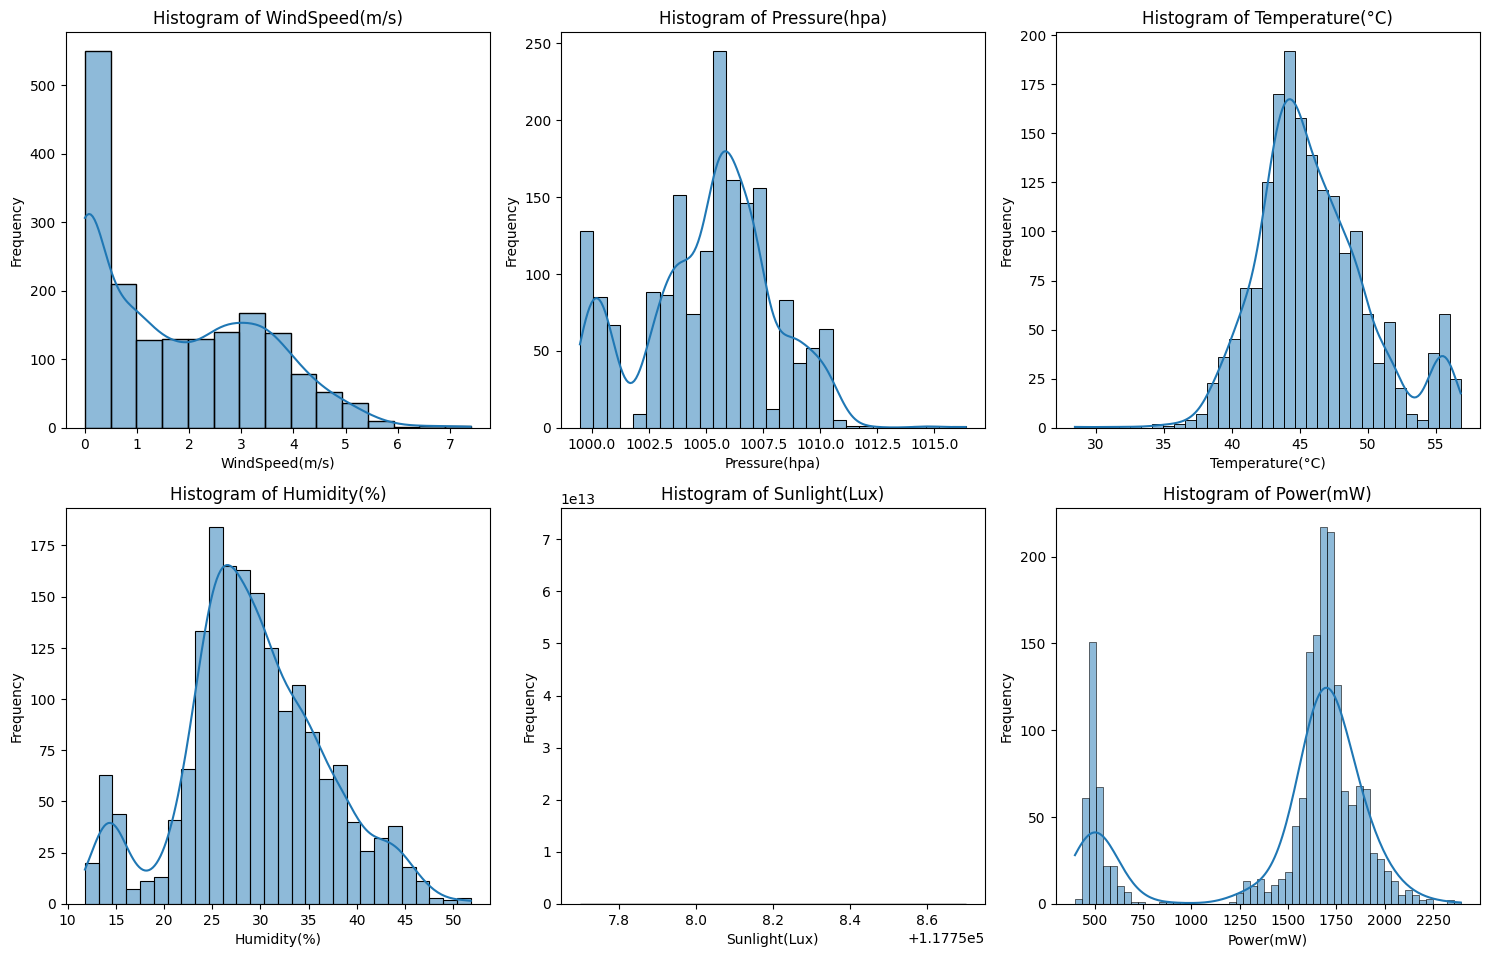

In [26]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [27]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0156 * Sunlight(Lux) + -70.8986


In [28]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0156
intercept = -70.8986

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [29]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101700.0,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000
mean,10.0,0.440297,1008.267588,30.597223,71.964359,16003.368857,178.302390
std,0.0,0.935875,4.925908,7.568174,24.377481,24750.418044,412.620889
min,10.0,0.000000,995.960000,13.630000,11.800000,20.000000,0.000000
25%,10.0,0.000000,1005.000000,25.240000,53.450000,2380.830000,1.330000
50%,10.0,0.000000,1007.300000,29.490000,75.390000,6628.330000,11.010000
75%,10.0,0.350000,1011.070000,34.800000,96.560000,17493.330000,82.660000
max,10.0,10.100000,1024.520000,56.800000,100.000000,157948.628205,2393.100000


In [30]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [31]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240301171410,0.09,1017.50,15.71,93.68,597.71,0.10
1,20240301172310,0.31,1017.43,15.72,94.34,425.50,0.05
2,20240301173310,0.07,1017.51,15.60,94.55,245.92,0.02
3,20240301174310,0.21,1017.60,15.67,95.26,130.17,0.01
4,20240301175310,0.02,1017.62,15.66,95.74,54.58,0.00
...,...,...,...,...,...,...,...
10165,20241002164810,2.59,1005.59,25.12,100.00,345.42,0.02
10166,20241002165810,1.15,1005.99,24.58,100.00,250.50,0.02
10167,20241002170810,0.00,1005.87,24.58,100.00,197.92,0.01
10168,20241002171810,0.00,1005.78,24.51,100.00,120.17,0.00


# HEATMAP

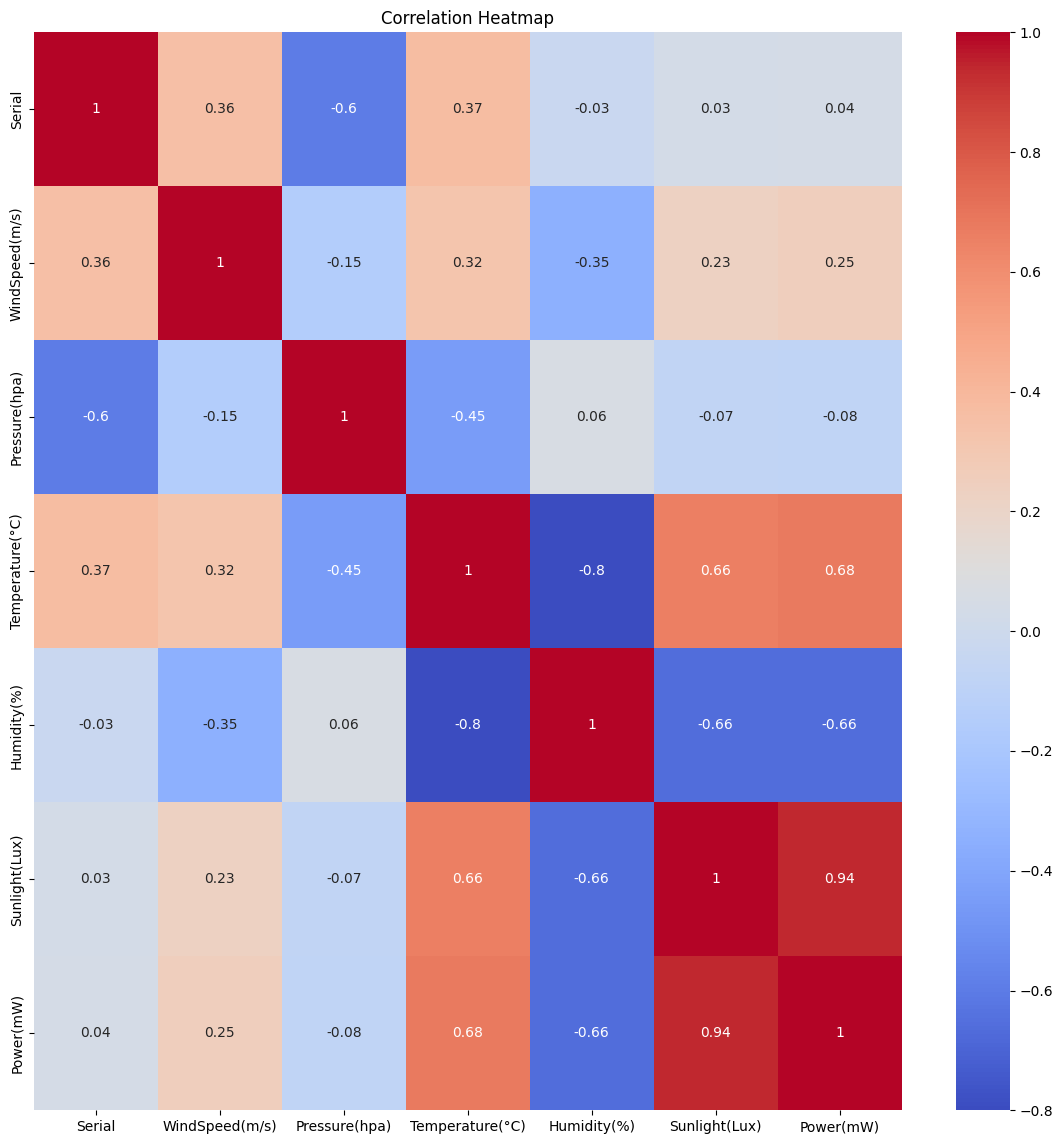

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.942241
Temperature(°C)    0.680669
Humidity(%)        0.658089
WindSpeed(m/s)     0.247476
Pressure(hpa)      0.081111
Serial             0.043279
Name: Power(mW), dtype: float64

In [34]:
df.to_csv('L10_Train_Revise.csv', index=False)